In [38]:
import os
import librosa
import librosa.display
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 변환할 자료를 전달하는 큐 // 음성 데이터셋이 들어갈 리스트 // 라벨 데이터셋이 들어갈 리스트
Temp_Array, INPUT_Date, Label_Data = [], [], []

# MFCC가 어떻게 작동되는지 보기 위해, 변환된 시험 데이터를 저장하는 리스트
Mel_frequency_cepstrum_List = []

# 각각의 발음 기호에 One - Hot - Encoding으로 라벨링을 한다.
OneHotVector_1 = [1, 0, 0, 0, 0]
OneHotVector_2 = [0, 1, 0, 0, 0]
OneHotVector_3 = [0, 0, 1, 0, 0]
OneHotVector_4 = [0, 0, 0, 1, 0]
OneHotVector_5 = [0, 0, 0, 0, 1]

# 텍스트로 저장한 사운드 파일을 모두 읽어들인다
Wave_1 = np.loadtxt('./data/75Raw_a.txt')
Wave_2 = np.loadtxt('./data/75Raw_e.txt')
Wave_3 = np.loadtxt('./data/75Raw_i.txt')
Wave_4 = np.loadtxt('./data/75Raw_o.txt')
Wave_5 = np.loadtxt('./data/75Raw_u.txt')

# 읽어들인 텍스트 파일의 정보를 20,000개 단위로 끊는다. 한 파일당 150만개가 있고 20000만개로 나누면 75줄이 된다.
# 실제로 한 발성의 텍스트 파일에 저장된 사람은 75명이다. 1명 = 20,000개
DATA_1 = np.reshape(Wave_1, (-1, 20000))  ## 20000개의 75명 데이터로 나누기
DATA_2 = np.reshape(Wave_2, (-1, 20000))  ## 20000개의 75명 데이터로 나누기
DATA_3 = np.reshape(Wave_3, (-1, 20000))  ## 20000개의 75명 데이터로 나누기
DATA_4 = np.reshape(Wave_4, (-1, 20000))  ## 20000개의 75명 데이터로 나누기
DATA_5 = np.reshape(Wave_5, (-1, 20000))  ## 20000개의 75명 데이터로 나누기

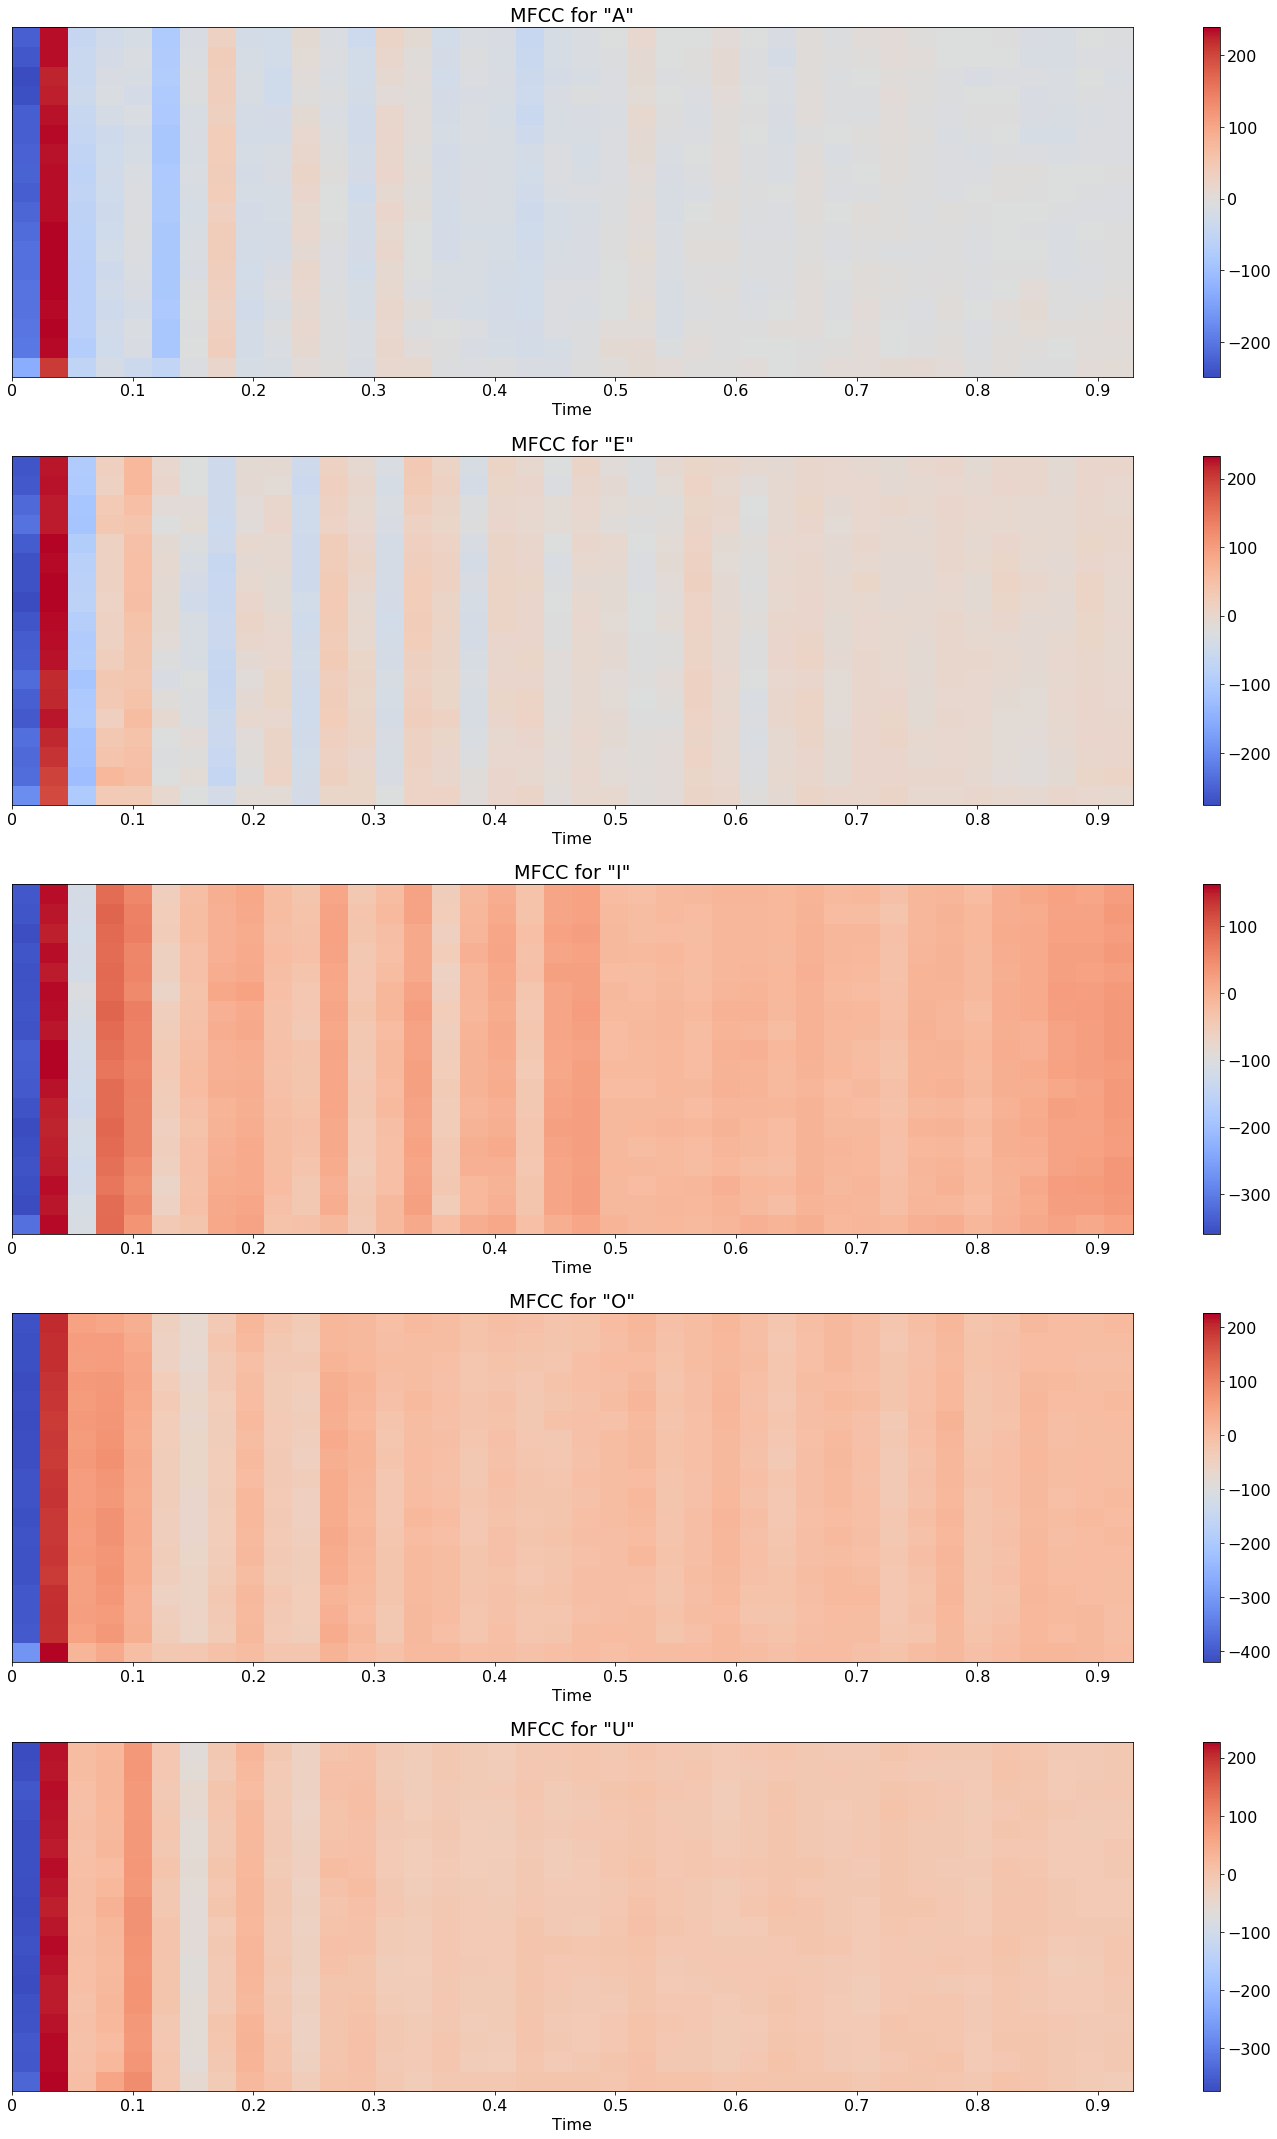

In [39]:
# 음성신호를 Mel-frequency cepstrum 전처리를 한 후, Temp_Array에 순서대로 extend
for k in range (75):
    TestData_1 = librosa.feature.mfcc(DATA_1[k], sr = 44100, n_mfcc = 40, n_fft = 2048, hop_length = 1024)[:, :-2].T
    TestData_2 = librosa.feature.mfcc(DATA_2[k], sr = 44100, n_mfcc = 40, n_fft = 2048, hop_length = 1024)[:, :-2].T
    TestData_3 = librosa.feature.mfcc(DATA_3[k], sr = 44100, n_mfcc = 40, n_fft = 2048, hop_length = 1024)[:, :-2].T
    TestData_4 = librosa.feature.mfcc(DATA_4[k], sr = 44100, n_mfcc = 40, n_fft = 2048, hop_length = 1024)[:, :-2].T
    TestData_5 = librosa.feature.mfcc(DATA_5[k], sr = 44100, n_mfcc = 40, n_fft = 2048, hop_length = 1024)[:, :-2].T
    
    Mel_frequency_cepstrum_List.extend(TestData_1)
    Mel_frequency_cepstrum_List.extend(TestData_1)
    Mel_frequency_cepstrum_List.extend(TestData_1)
    Mel_frequency_cepstrum_List.extend(TestData_1)
    Mel_frequency_cepstrum_List.extend(TestData_1)
    
plt.figure(figsize=(20, 30))
plt.rc ("font", size = 16)
plt.subplot(5, 1, 1)
librosa.display.specshow(TestData_1, x_axis='time')
plt.colorbar()
plt.title('MFCC for "A"')
plt.tight_layout()

plt.subplot(5, 1, 2)
librosa.display.specshow(TestData_2, x_axis='time')
plt.colorbar()
plt.title('MFCC for "E"')
plt.tight_layout()

plt.subplot(5, 1, 3)
librosa.display.specshow(TestData_3, x_axis='time')
plt.colorbar()
plt.title('MFCC for "I"')
plt.tight_layout()
                         
plt.subplot(5, 1, 4)
librosa.display.specshow(TestData_4, x_axis='time')
plt.colorbar()
plt.title('MFCC for "O"')
plt.tight_layout()
                         
plt.subplot(5, 1, 5)
librosa.display.specshow(TestData_5, x_axis='time')
plt.colorbar()
plt.title('MFCC for "U"')
plt.tight_layout()

plt.show()

In [40]:
Temp_Array = [] # 리스트에서 리스트를 전달할 인자
INPUT_Data = [] # 음성 데이터셋이 들어갈 리스트
Label_Data = [] # 라벨 데이터셋이 들어갈 리스트

# 음성신호를 Mel-frequency cepstrum 전처리를 한 후, Temp_Array에 순서대로 extend
# 여기서는 number of mfcc를 40이 아닌 20으로 지정
for k in range (75):
    MFCC_Data_1 = librosa.feature.mfcc(DATA_1[k], sr = 44100, n_mfcc = 20, n_fft = 2048, hop_length = 1024)[:, :-2].T
    MFCC_Data_2 = librosa.feature.mfcc(DATA_2[k], sr = 44100, n_mfcc = 20, n_fft = 2048, hop_length = 1024)[:, :-2].T
    MFCC_Data_3 = librosa.feature.mfcc(DATA_3[k], sr = 44100, n_mfcc = 20, n_fft = 2048, hop_length = 1024)[:, :-2].T
    MFCC_Data_4 = librosa.feature.mfcc(DATA_4[k], sr = 44100, n_mfcc = 20, n_fft = 2048, hop_length = 1024)[:, :-2].T
    MFCC_Data_5 = librosa.feature.mfcc(DATA_5[k], sr = 44100, n_mfcc = 20, n_fft = 2048, hop_length = 1024)[:, :-2].T
    
    MFCC_Data_1 = np.reshape(MFCC_Data_1, (360))
    MFCC_Data_2 = np.reshape(MFCC_Data_2, (360))
    MFCC_Data_3 = np.reshape(MFCC_Data_3, (360))
    MFCC_Data_4 = np.reshape(MFCC_Data_4, (360))
    MFCC_Data_5 = np.reshape(MFCC_Data_5, (360))
    
    Temp_Array.extend(MFCC_Data_1)
    Temp_Array.extend(MFCC_Data_2)
    Temp_Array.extend(MFCC_Data_3)
    Temp_Array.extend(MFCC_Data_4)
    Temp_Array.extend(MFCC_Data_5)

###########################################################################################
###########################################################################################

# One Hot Vector 라벨링을 순서대로 Label_Data에 extend
# 학습 순서에 맞게 정답 레이블들을 짜는 부분
for i in range (75) :
    Label_Data.extend(OneHotVector_1)
    Label_Data.extend(OneHotVector_2)
    Label_Data.extend(OneHotVector_3)
    Label_Data.extend(OneHotVector_4)
    Label_Data.extend(OneHotVector_5)
    # for 문의 결과는 라벨1 라벨2 라벨3 라벨4 라벨5 ... 이러한 방식으로 진행
    
INPUT_Data = np.reshape(Temp_Array, (375, 360))
Label_Data = np.reshape(Label_Data, (-1, 5))

print ('신호 데이터의 크기', np.shape (INPUT_Data))
print ('라벨 데이터의 크기 ', np.shape (Label_Data))

신호 데이터의 크기 (375, 360)
라벨 데이터의 크기  (375, 5)


In [42]:
INPUT_Data = np.reshape(INPUT_Data, (-1, 360))
Label_Data = np.reshape(Label_Data, (-1, 5))
print ('음성 데이터셋의 크기', np.shape (INPUT_Data))
print ('정답 데이터셋의 크기 ', np.shape (Label_Data))
print ('음성 데이터셋 하나의 크기', np.shape (INPUT_Data[0]))
print ('정답 데이터셋 하나의 크기 ', np.shape (Label_Data[0]))

음성 데이터셋의 크기 (375, 360)
정답 데이터셋의 크기  (375, 5)
음성 데이터셋 하나의 크기 (360,)
정답 데이터셋 하나의 크기  (5,)


In [43]:
# 준비된 데이터 세트 375개 중 360개는 학습 데이터로, 15개는 검사 데이터로 활용하기 위해서 리스트를 Cut
TrainingInputData = INPUT_Data [0:360]
TrainingLabelData = Label_Data [0:360]
TestInputData = INPUT_Data [360 : 375]
TestLabelData = Label_Data [360 : 375]

print ('훈련용 음성 데이터셋의 크기', np.shape (TrainingInputData))
print ('훈련용 정답 데이터셋의  크기 ', np.shape (TrainingLabelData))
print ('검사용 음성 데이터셋의 크기', np.shape (TestInputData))
print ('검사용 정답 데이터셋의 크기 ', np.shape (TestLabelData))

훈련용 음성 데이터셋의 크기 (360, 360)
훈련용 정답 데이터셋의  크기  (360, 5)
검사용 음성 데이터셋의 크기 (15, 360)
검사용 정답 데이터셋의 크기  (15, 5)


In [44]:
# 편향된 학습을 막기 위해, 데이터 Shuffle을 하는 코드
Training_Combine = list(zip(TrainingInputData, TrainingLabelData))
Test_Combine = list(zip(TestInputData, TestLabelData))
np.random.shuffle(Training_Combine)
np.random.shuffle(Test_Combine)

TraiInputData_Shuffle, TraiLabelData_Shuffle = (zip(*Training_Combine))
TestInputData_Shuffle, TestLabelData_Shuffle = (zip(*Test_Combine))

TraiInputData_Shuffle = np.reshape(TraiInputData_Shuffle, (360, 18, 20, 1))
TestInputData_Shuffle = np.reshape(TestInputData_Shuffle, (15, 18, 20, 1))
print(type(TraiInputData_Shuffle), type(TraiLabelData_Shuffle),
      type(TestInputData_Shuffle), type(TestLabelData_Shuffle))

TraiLabelData_Shuffle = np.asarray(TraiLabelData_Shuffle)
TestLabelData_Shuffle = np.asarray(TestLabelData_Shuffle)

"""
Tensorflow, Keras에 data를 입력할때는 numpy.ndarray 형태로 들어가야한다.
"""
print(type(TraiInputData_Shuffle), type(TraiLabelData_Shuffle),
      type(TestInputData_Shuffle), type(TestLabelData_Shuffle))

<class 'numpy.ndarray'> <class 'tuple'> <class 'numpy.ndarray'> <class 'tuple'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [110]:
inputVowelDataSets = tf.keras.Input(shape = [18, 20, 1])
Model = tf.keras.layers.Conv2D(30, 2, strides = (2, 2)) (inputVowelDataSets)
Model = tf.keras.activations.relu(Model)
print(np.shape(Model))
Model = tf.keras.layers.Conv2D(60, 2, strides = (2, 2)) (Model)
Model = tf.keras.activations.relu(Model)
print(np.shape(Model))
Model = tf.keras.layers.Conv2D(120, 2, strides = (2, 2)) (Model)
Model = tf.keras.activations.relu(Model)
print(np.shape(Model))
Model = tf.keras.layers.Flatten()(Model)
print(np.shape(Model))
Model = tf.keras.layers.Dense(160, activation = 'relu')(Model)
Model = tf.keras.layers.Dense(80, activation = 'relu')(Model)
outputs = tf.keras.layers.Dense(5, activation = 'softmax')(Model)

"""
categorical_crossentropy와 sparse_categorical_crossentropy의 차이점

1) categorical_crossentropy
One hot encoding된 데이터가 입력으로 들어가고, 비교시 실측 결과도 One hot encoding된 형태
2) sparse_categorical_crossentropy
One hot encoding하지 않은 데이터를 입력으로 넣고, Taget과 비교 시에도 interger 형태로 계산

이 model의 labeling data는 one hot encoding 형태이다. 따라서 categorical_crossentropy
"""
model = tf.keras.Model(inputs = inputVowelDataSets, outputs = outputs, name = "Test")
model.compile(optimizer = tf.keras.optimizers.Adam(0.003),
              loss = 'categorical_crossentropy',
              metrics = ["accuracy"])
model.summary()

checkpointPath = "save_file/savefile.ckpt"
checkpointDir = os.path.dirname(checkpointPath)
checkpointCallBack = tf.keras.callbacks.ModelCheckpoint(checkpointPath,
                                                     save_weights_only=True,
                                                     verbose=1)
print(checkpointDir)

(None, 9, 10, 30)
(None, 4, 5, 60)
(None, 2, 2, 120)
(None, 480)
Model: "Test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 18, 20, 1)]       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 9, 10, 30)         150       
_________________________________________________________________
tf_op_layer_Relu_66 (TensorF [(None, 9, 10, 30)]       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 4, 5, 60)          7260      
_________________________________________________________________
tf_op_layer_Relu_67 (TensorF [(None, 4, 5, 60)]        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 2, 2, 120)         28920     
_______________________________________________________________

In [111]:
history = model.fit(TraiInputData_Shuffle, TraiLabelData_Shuffle,
                  verbose = 1, epochs = 30, batch_size = 8,
                  validation_split = 0.1, callbacks = [checkpointCallBack])

Train on 324 samples, validate on 36 samples
Epoch 1/30
152/324 [=============>................] - ETA: 0s - loss: 2.4884 - accuracy: 0.4408 
Epoch 00001: saving model to save_file/savefile.ckpt
324/324 [==============================] - 1s 2ms/sample - loss: 1.5007 - accuracy: 0.6142 - val_loss: 0.2603 - val_accuracy: 0.9167
Epoch 2/30
184/324 [================>.............] - ETA: 0s - loss: 0.5611 - accuracy: 0.7554
Epoch 00002: saving model to save_file/savefile.ckpt
324/324 [==============================] - 0s 537us/sample - loss: 0.5138 - accuracy: 0.7809 - val_loss: 0.2666 - val_accuracy: 0.8889
Epoch 3/30
176/324 [===============>..............] - ETA: 0s - loss: 0.4260 - accuracy: 0.8580
Epoch 00003: saving model to save_file/savefile.ckpt
324/324 [==============================] - 0s 617us/sample - loss: 0.3988 - accuracy: 0.8765 - val_loss: 0.5910 - val_accuracy: 0.8333
Epoch 4/30
264/324 [=======================>......] - ETA: 0s - loss: 0.4848 - accuracy: 0.8258
Epoch 00

Epoch 30/30
184/324 [================>.............] - ETA: 0s - loss: 0.4821 - accuracy: 0.8750
Epoch 00030: saving model to save_file/savefile.ckpt
324/324 [==============================] - 0s 565us/sample - loss: 0.4411 - accuracy: 0.8673 - val_loss: 0.2714 - val_accuracy: 0.9167


In [112]:
"""
model을 평가
1) 375개 데이터에서 360개의 훈련 데이터, 15개의 검증 데이터
2) 375개 데이터에서 345개의 훈련 데이터, 30개의 검증 데이터
3) 375개 데이터에서 330개의 훈련 데이터, 45개의 검증 데이터
"""
model.evaluate(TestInputData_Shuffle, TestLabelData_Shuffle)

15/15 [==============================] - 0s 267us/sample - loss: 0.4068 - accuracy: 0.8667


[0.4068056643009186, 0.8666667]

In [113]:
"""
테스트한 모델로 무엇을 맞추고, 무엇을 못 맞추었는지 모델 예측
"""

# model predict에서 예측값을 one hot encoding 라벨링하는 함수
def One_Hot_Encoding (inputs):
    
    for number in range (15):
        for index in range(5):

            if inputs[number][index] == max(inputs[number]):
                inputs[number][index] = int(1)
            else:
                inputs[number][index] = int(0)
    
    outputs = inputs
    
    return outputs

result = model.predict(TestInputData_Shuffle) 
Probable = One_Hot_Encoding(result)

for index in range (15):
    print (Probable[index], TestLabelData_Shuffle[index])

[1. 0. 0. 0. 0.] [1 0 0 0 0]
[0. 1. 0. 0. 0.] [0 1 0 0 0]
[0. 0. 1. 0. 0.] [0 0 1 0 0]
[1. 0. 0. 0. 0.] [1 0 0 0 0]
[1. 0. 0. 0. 0.] [1 0 0 0 0]
[0. 0. 0. 1. 0.] [0 0 0 1 0]
[0. 0. 0. 0. 1.] [0 0 0 0 1]
[0. 1. 0. 0. 0.] [0 1 0 0 0]
[0. 1. 0. 0. 0.] [0 0 0 0 1]
[0. 0. 0. 1. 0.] [0 0 0 1 0]
[0. 1. 0. 0. 0.] [0 0 1 0 0]
[0. 0. 1. 0. 0.] [0 0 1 0 0]
[0. 0. 0. 1. 0.] [0 0 0 1 0]
[0. 0. 0. 0. 1.] [0 0 0 0 1]
[0. 1. 0. 0. 0.] [0 1 0 0 0]


In [114]:
if __name__ == "__main__":
    model.load_weights(checkpointPath)
    loss,acc = model.evaluate(TestInputData_Shuffle,  TestLabelData_Shuffle, verbose=2)
    print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

15/15 - 0s - loss: 0.4068 - accuracy: 0.8667
복원된 모델의 정확도: 86.67%


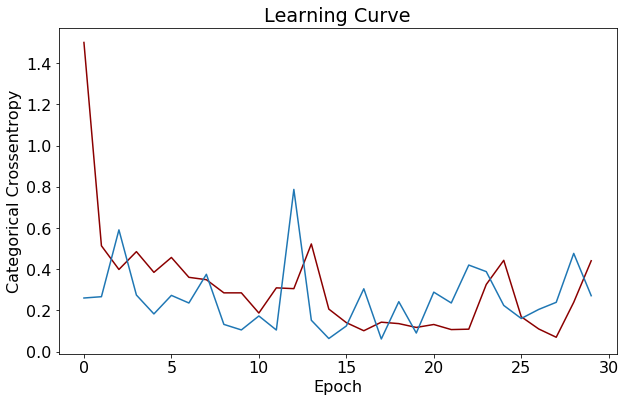

In [115]:
import matplotlib.pyplot as plt
plt.figure (figsize = (10, 6))
plt.title ("Learning Curve")
plt.xlabel ("Epoch")
plt.ylabel ("Categorical Crossentropy")
plt.plot (history.history["loss"], label = ["Train"], color = "darkred")
plt.plot (history.history["val_loss"], label = ["Valadation"])